# *Metody obliczeniowe/Metody numeryczne*
## *Laboratorium 5*
## *Kwadratury*

## Spis treści

* [Wstęp](#wstep)
* [Obliczanie dokładnej wartości całki](#exact)
* [Ćwiczenie 1](#cw1)
* [Kwadratury Newtona-Cotesa](#Newton_Cotes)
* [Metoda prostokątów](#rectangle)
* [Ćwiczenie 2](#cw2)
* [Metoda trapezów](#trapezoid)
* [Ćwiczenie 3](#cw3)    
* [Metoda Simpsona](#simpson)
* [Ćwiczenie 4](#cw4)    
* [Metoda Monte Carlo](#mmonte_carlo)
* [Ćwiczenie 5](#cw5)
* [Ćwiczenie 6](#cw6)
* [Kwadratury Gaussa](#gauss)
* [Ćwiczenie 7](#cw7)
* [Całkowanie w Pythonie ](#python)
* [Ćwiczenie 8](#cw8)
* [Metody adaptacyjne](#adaptive)
* [Ćwiczenie 9](#cw9)    

## Część teoretyczna <a class="anchor" id="wstep"></a>

<div align="justify">
    <b>Całka</b> jest jednym z najważniejszych pojęć współczesnej analizy matematycznej. Stosuje się ją w matematyce, fizyce, technice i wielu innych dziedzinach. W matematyce badaniem własności i obliczeniem wartości całek zajmuje się dział zwany rachunkiem całkowym. 
</div>

### Całka nieoznaczona

<div align="justify">
    <b>Całką nieoznaczoną</b> nazywamy odwrotność pochodnej danej funkcji.
</div>

\begin{equation}
 F'(x) = F(x)
\tag{1}
\end{equation}

<div align="justify">
    Funkcję $F(x)$ nazywamy <b>funkcją pierwotną</b> danej funkcji $f(x)$. Całkę nieoznaczoną opisujemy:
</div>

\begin{equation}
 \int f(x)\,dx = F(x) + C
\tag{2}
\end{equation}

### Całka oznaczona


<div align="justify">
    <b>Całka oznaczona</b> to pole powierzchni między wykresem funkcji $f(x)$ w pewnym przedziale $<a,b>$.
        Całka oznaczona funkcji $f(x)$ w przedziale $<a,b>$ oznaczana jest symbolem:
</div>
    
\begin{equation}
\int_{a}^{b} f(x)
\tag{3}
\end{equation}    
    
<div align="justify">  
    Jeśli znamy całkę nieoznaczoną $F(x)$ funkcji podcałkowej $f(x)$, to całkę oznaczoną funkcji $f(x)$ w przedziale $<a,b>$ możemy obliczyć z twierdzenia Newtona Leibniza:
</div>

\begin{equation}
\int_{a}^{b} f(x)\,dx = F(b) - F(a)
\tag{4}
\end{equation}  

<div align="justify">  
    Nie stosujemy jednak tego sposobu w obliczeniach komputerowych, ponieważ znalezienie całki nieoznaczonej jest zadaniem numerycznie skomplikowanym.
</div>

<div align="justify">  
    W obliczeniach numerycznych stosuje się definicję Reimanna, w której całka oznaczona jest przedstawiana jako suma pól obszarów ograniczonych wykresem funkcji $f(x)$ oraz osią OX. Elementy znajdujące się pod osią OX mają wartość ujemną.
</div>

<div align="justify">  
   Podzielmy przedział całkowania na bardzo dużo małych przedziałów $<x_{i-1},x_i>$. Wewnątrz każdego z tych przedziałów wybierzemy dowolny punkt $t_i$ taki, że $x_{x-1} < t <{x_i}$. Całka oznaczona Riemanna może być zinterpretowana jako suma wielu bardzo wąskich prostokątów o podstawie równej $(x_i - x_{i-1})$ i wysokości $f(t_i)$, czyli
</div>
 
\begin{equation}
\int_{x_a}^{x_b} f(x)\,dx = \lim_{n\to\infty} \sum_{i=1}^{n} f(t_i)(x_i-x_{i-1})
\tag{5}
\end{equation}  

<div align="justify">  
   Gdy odległość pomiędzy punktami podziałowymi zbliża się do zera, suma pól prostokątów dąży do pola obszaru ograniczonego wykresem funkcji.
</div>

## Dokładna wartość całki przy użyciu biblioteki SymPy <a class="anchor" id="exact"></a>
<br>
<div align="justify">
    Do znalezienia dokładnej wartości całki posłużymy się biblioteką <b>SymPy</b>. Biblioteka ta używana jest do obliczeń naukowych i technicznych. SymPy zawiera moduły do optymalizacji, algebry liniowej, interoplacji i co interesuje nas w tym momencie do całkowania.<br><br>
    Dokładna wartość całki posłuży nam do porównania z metodami całkowania numerycznego.
</div>
<br>

<div align="justify">
    Biblioteka SymPy dostarcza funkcję <b>integrate</b>, której nagłówek wygląda następująco: 
    <br><br>
<b>integrate(f,(x,a,b))</b>
    gdzie jej parametry to:
 
<ul>
   <li> f - funkcja, dla której szukamy całki</li>
   <li>  x - zmienna, po której całkujemy</li>
   <li>  a, b - przedział całkowania</li>
</ul>

   wartością zwracaną przez funkcję jest dokładna wartość całki
</div>

Przykład całkowania funkcji <b>sin(x)</b> przy pomocy funkcji <b>integrate()</b> znajduje się w boloku poniżej

In [2]:
import sympy as sp
import numpy as np

x = sp.Symbol('x')
g = sp.sin(x)
s = sp.integrate(g,(x,0,2))
print("Dokładna wartość całki z funkcji sin(x) na przedziale <0,2> wynosi " ,s.evalf())


Dokładna wartość całki z funkcji sin(x) na przedziale <0,2> wynosi  1.41614683654714


## Ćwiczenie 1 <a class="anchor" id="cw1"></a>

<div align="justify">
Zdefiniuj funkcję $f$ będącą implementacją wzoru, przedziały całkowania a, b oraz liczbę przedziałów n, na które będzie dzielony przedział całkowania  
\begin{equation}
 y = x^3 + 2x^2 + 1
\end{equation}
    
Do rozwiązania tego punktu można użyć operatora potęgowania **\*\***, a sam wzór zdefiniować jako zwyczajną <a href="https://www.w3schools.com/python/python_functions.asp">funkcję</a> lub wyrażenie <a href="https://www.w3schools.com/python/python_lambda.asp">lambda</a>.
</div>
</div>    

In [3]:
import numpy as np
# Zdefiniowanie funkcji
## TODO
f = lambda x: np.power(x,3) + 2*np.power(x,2)+1
# lub
# def f(x): ...

# dolny przedział całkowania
a = 0

# górny przedział całkoania
b = 0.8

# liczba podprzedziałów 
n = 5

Poniżej zdefiniowana jest funkcja przy pomocy notacji obsługiwanej przes bibliotekę <b>SymPy</b>. Nie możemy użyć funkcji zdefiniowanej w bloku powyżej ponieważ funkcje z bibloteki <b>NumPy</b> są stworzone do działania z tablicami, a nie znakami z z <b>SymPy</b>

In [4]:
x = sp.Symbol('x')
g = x**3 + 2*x**2 + 1
s = sp.integrate(g,(x,a,b))
print("Dokładna wartość całki wynosi ",s.evalf())

Dokładna wartość całki wynosi  1.24373333333333


## Kwadratury Newtona-Cotesa <a class="anchor" id="Newton_Cotes"></a>

### Metoda prostokątów<a class="anchor" id="rectangle"></a>
<div align="justify">

W tej metodzie korzystamy z definicji uprzednio opisanej całki oznaczonej Riemanna.
Przedział całkowania  $ <x_a, x_b > $ dzielimy na n równo odległych punktów $ x_1, x_2,..., x_n.$ Punkty te wyznaczamy w prosty sposób wg wzoru:
</div>
dla $ i = 1, 2, ..., n$
    
\begin{equation}
x_i = x_a + (i-\dfrac{1}{2})h
\tag{6}
\end{equation}

<div align="justify">
gdzie $ h = \dfrac{x_b-x_a}{n} $, co jest równe odległości pomiędzy sąsiednimi punktami $ x_{i-1}, x_i .$ 
Dla każdego wyznaczonego w ten sposób punktu obliczamy wartość funkcji $ f(x) $ w tym punkcie:
</div>
    
\begin{equation}
    f_i = f(x_i)
\tag{7}
\end{equation}
    
dla $ i = 1,2,...,n $

<div align="justify">
Suma pól prostokątów  o boku $ h $ oraz $ f(x_i)$ jest przybliżoną wartością całki oznaczonej dla funkcji $ f(x) $ w przedziale $ <x_a,x_b> $.
</div>

\begin{equation}
\int_{x_a}^{x_b} f(x) \,dx \approx h\sum_{i=1}^{n} f(x_i)
\tag{8}
\end{equation}

Metoda jest bardzo prosta w implementacji:
<br><br>
</div>
Pseudo kod dla metody prostokątów:

<div id = "Algorytm_1" style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;" >
        <b><h4>Algorytm 1</h4></b>   
<br>
    
&nbsp;<b>Wejście:</b>
<ul>
    <li> f - funkcja, dla której szukamy całki </li>
    <li> a, b - przedział całkowania </li>
    <li> n - ilość podprzedziałów, na które dzielimy odcinek $<a,b>$ </li>
</ul>  
    
&nbsp;<b>Wyjście:</b>
<ul>
    <li> I - przybliżenie całki </li>
</ul>
    
&nbsp;<b>Algorytm:</b>
<ul style="list-style-type: none;"> 
    <li><b>funkcja</b> f_rectI(f,a,b,n) </li>
    <li> h &larr; (b-a)/n </li>
    <li> X &larr; a + (i-1/2)*h </li>
    <li> Y &larr; f(X) </li>
    <li> I &larr; h * sum(Y) </li>    
</ul>    
</div>

## Ćwiczenie 2<a class="anchor" id="cw2"></a>


Korzystając z [Algorytmu 1](#Algorytm_1) dokonaj implementacji kwadratury Newtona-Cotesa - metoda prostokątów. Znajduje się ona w poniższej komórce.
Jej wywołanie wygląda następująco:
    
```python
I = f_rectI(f,a,b,n)
```

gdzie jej parametry to:
* &ensp;f - funkcja, dla której szukamy całki
* &ensp;a, b - przedział całkowania
* &ensp;n - ilość podprzedziałów, na które dzielimy odcinek <a,b>

a zwracane wartości to:

* &ensp;I - przybliżenie całki    

In [5]:
import numpy as np

def f_rectI(f,a,b,n):
    """
    :param fun: funkcja
    :param a: dolny przedział całkowania
    :param b: górny przedział całkowania
    :param n: ilość podprzedziałów, na które dzielimy odcinek <a,b>
    :return: przybliżona wartość całki
    """

    # szerokość pojedynczego przedziału
    h = (b - a) / n

    # zwraca n równo rozmieszczonych punktów z przedziału <a,b>
    X = np.linspace(a + 0.5 * h, b - 0.5 * h, num=n)

    # Lista wartości funkcji w punktach Xi
    Y = []
    for i in range(0, n):
        Y.append(f(X[i]))

    ## LUB
    #y = [fun1(x) for x in np.linspace(a, b, num=n)]

    # konwertowanie listy na Listę NumPy, którą da się przemnożyć przez liczbę
    Y = np.array(Y)

    # wartość przybliżona całki
    I = h * Y
    I = np.sum(I)
    return I


I = f_rectI(f,a,b,n)

print("Przybliżenie całki metodą prostokątów wynosi = %f" % I)
print("Dokładna wartość całki to = %f" % s.evalf())
print("Błąd oszacowania to = ", s.evalf() - I)


Przybliżenie całki metodą prostokątów wynosi = 1.238272
Dokładna wartość całki to = 1.243733
Błąd oszacowania to =  0.00546133333333332


<div align="justify">
 <b><h3>Wizualizacja metody prostokątów</h3></b>
</div>

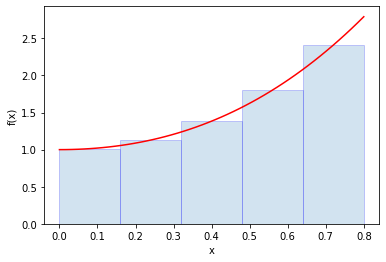

In [19]:
import numpy as np
import matplotlib.pyplot as plt
h = (float)(b - a) / n
X = np.linspace(a + 0.5 * h, b - 0.5 * h, num=n)
Y = []
for i in range(0, n):
    Y.append(f(X[i]))
Y = np.array(Y)        
x = np.linspace(a,b)
#rysowanie funkcji
fig, ax = plt.subplots()
ax.plot(x, f(x), 'r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.bar(X,Y,width=(b-a)/n,alpha=0.2,edgecolor='b')
plt.show()


### Metoda trapezów<a class="anchor" id="trapezoid"></a>
<div align="justify">
Podobnym do uprzednio zaprezentowanego rozwiązania sposobem jest zastosowanie zamiast prostokątów - trapezów o wysokości h i podstawach równych odpowiednio wartości funkcji w punktach krańcowych. Dalsza kolejność działania nie odbiega od metody prostokątów. Przedział całkowania  $ <x_a, x_b > $ dzielimy na n równo odległych punktów $ x_1,x_2,...,x_n.$ Punkty te wyznaczamy w prosty sposób wg wzoru:
</div>
dla $ i = 1,2,...,n$

\begin{equation}
\tag{9}
x_i = x_a + ih ,
\end{equation}

<div align="justify">
gdzie $ h = \dfrac{x_b - x_a}{n}$, co jest równe odległości pomiędzy sąsiednimi punktami $ x_i-1, x_i $. Dla każdego wyznaczonego w ten sposób punktu obliczamy wartość funkcji $ f(x) $ w tym punkcie:
</div>

\begin{equation}
\tag{10}
f_i = f(x_i)
\end{equation}

dla $i = 0,1,2,...,n$

<div align="justify">
Wartością przybliżenia jest suma n trapezów o podstawach $ f(x_{i-1}) $ oraz $ f(x_i) $ i o wysokości h. Uproszczony i uporządkowany wzór prezentuje się następująco:
</div>

\begin{equation}
\tag{10}
\int_{x_a}^{x_b} f(x) \,dx = h (\sum_{i=1}^{n-1} f(x_i) + \frac{f(x_a) + f(x_b)}{2})
\end{equation}


Pseudo kod dla metody trapezów:
<div id = "Algorytm_2" style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;" >
<b><h4>Algorytm 2</h4></b> 
<br>
&nbsp;<b>Wejście:</b>
<ul>
    <li> f - funkcja, dla której szukamy całki </li>
    <li> a, b - przedział całkowania </li>
    <li> n - ilość podprzedziałów, na które dzielimy odcinek $<a,b>$ </li>
</ul>  
    
&nbsp;<b>Wyjście:</b>
<ul>
    <li> I - przybliżenie całki </li>
</ul>

&nbsp;<b>Algorytm:</b>
<ul style="list-style-type: none;"> 
    <li><b>funkcja </b>f_trapI(f,xa,xb,n)<\li> 
    <li> h &larr; (xb-xa)/n </li>
    <li> i &larr; 0,1,2,...,n </li>
    <li> X &larr; xa+i*h </li>
    <li> Y &larr; f(X) </li>
    <li> <b> for </b> i &larr; 0 <b> to </b> n+1 <b> do </b> <br>    
        <ul style="list-style-type: none;">
            <li> <b> if </b> <i> i == 0 or i==n </i> <b> then </b> </li>
                <li>  &nbsp;I += h*Y[i]/2 </li>
            <li> <b>else </b> </li>
                <li>  &nbsp;I += h*Y[i] </li> 
         </ul> 
    <li> <b> end for </b> </li>    
    <li> I &larr; sum(I)</li>
    </ul>
</div>    


## Ćwiczenie 3<a class="anchor" id="cw3"></a>

Korzystając z [algorytmu 2](#Algorytm_2) dokonaj implementacji kwadratury Newtona-Cotesa - metoda trapezów. Znajduje się ona w poniższej komórce.
Jej wywołanie wygląda następująco:
    
```python
I = f_trapI(f,a,b,n)
```

gdzie jej parametry to:
* &ensp;fun - funkcja, dla której szukamy całki
* &ensp;a, b - przedział całkowania
* &ensp;n - ilość podprzedziałów, na które dzielimy odcinek <a,b>

a zwracane wartości to:

* &ensp;I - przybliżenie całki    

In [7]:
import numpy as np

def f_trapI(f, a, b, n):
    """
    :param fun: funkcja
    :param xa: dolny przedział całkowania
    :param xb: górny przedział całkowania
    :param n: ilość podprzedziałów, na które dzielimy odcinek <a,b>
    :return: przybliżona wartość całki
    """
    # szerokość pojedynczego przedziału
    h = (b - a) / n

    # linspace() zwraca n równo rozmieszczonych punktów z przedziału <a + 0.5 * h, b - 0.5 * h>
    X = np.linspace(a, b, num=n + 1)

    Y = []
    # umieszczenie w tablicy Y wartości funkcji dla każdego xi
    for i in range(0, n + 1):
        Y.append(f(X[i]))

    # konwertowanie tablicy Y na tablicę NumPy, którą da się przemnożyć przez liczbę
    Y = np.array(Y)

    # obliczenie przybliżonej wartości całki.
    I = []
    for i in range(0, n + 1):
        if i == 0 or i == n:
            I.append(h * Y[i] / 2)
        else:
            I.append(h * Y[i])

    I = np.sum(I)
    return I

print("Przybliżenie całki metodą trapezów wynosi = %f" % I)
print("Dokładna wartość całki to = %f" % s.evalf())
print("Błąd oszacowania to = ", s.evalf() - I)

Przybliżenie całki metodą trapezów wynosi = 1.238272
Dokładna wartość całki to = 1.243733
Błąd oszacowania to =  0.00546133333333332


<div align="justify">
 <b><h3>Wizualizacja metody trapezów</h3></b>
</div>

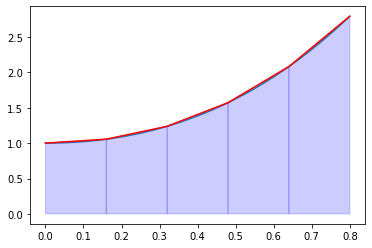

In [8]:

import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(a, b, num=n + 1)
Y = []
for i in range(0, n + 1):
    Y.append(f(X[i]))
Y = np.array(Y)

x = np.linspace(a,b,1000)
fig, ax = plt.subplots()
ax.plot(x,f(x), label="x^2")
ax.plot(X,f(X),color = "red")

for i in range(n):
    xs = [X[i],X[i],X[i+1],X[i+1]]
    ys = [0,f(X[i]),f(X[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)
    
plt.show()

### Metoda Simpsona<a class="anchor" id="simpson"></a>
<div align="justify">
Metoda Simpsona w odróżnieniu do poprzednich algorytmów wykorzystuje do przybliżeń parabole. Zamiast pól prostokątów czy trapezów będziemy obliczać pola wycinków pod parabolą.
    Przedział całkowania $ <x_a,x_b> $ dzielimy na $n$ równo odległych punktów $ x_0,x_1,x_2,...,x_n $:
</div>
dla $ i = 0,1,2,...,n $

\begin{equation}
x_i = x_a + ih
\tag{12}
\end{equation}

<div align="justify" >
gdzie $ h = \frac {x_b-x_a}{n}$, co jest równe odległości pomiędzy sąsiednimi punktami $ x_{x-1}, x_i $. 
</div>

<div align="justify" >
W każdym podprzedziale $ <x_{i-1},x_i> $ przybliżamy funkcję za pomocą paraboli. Ostatecznie uporządkowany wzór pozwala na obliczenie sum pól wycinków pod parabolami przybliżającymi funkcję f(x) w następujący sposób:
</div>

\begin{equation}
\int_{x_a}^{x_b} f(x) \,dx = \frac{h}{3}[[f(x_{ax}) + f(x_{bx})] + \sum_{i=1,3,5}^{n-1} 4f(x_i) + \sum_{i=2,4,6}^{n-2} 2f(x_i)]
\tag{15}
\end{equation}

Pseudo kod dla metody Simpsona:
<div id = "Algorytm_3" style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;" >
<b><h4>Algorytm 3</h4></b>   
<br>
&nbsp;<b>Wejście:</b>
<ul>
    <li> f - funkcja, dla której szukamy całki </li>
    <li> a, b - przedział całkowania </li>
    <li> n - ilość podprzedziałów, na które dzielimy odcinek $<a,b>$ </li>
</ul>  
    
&nbsp;<b>Wyjście:</b>
<ul>
    <li> I - przybliżenie całki </li>
</ul>
    
&nbsp;<b>Algorytm:</b>
<ul style="list-style-type: none;"> 
    <li><b>funkcja </b>f_simpI(f,a,b,n)</li>
    <li> h &larr; (b-a)/n </li>
    <li> I &larr; f(a) + f(b) </li>
    <li> <b> for </b> i &larr; 1 <b> to </b> n <b> do </b> <br>    
        <ul style="list-style-type: none;">
            <li> <b> if </b> <i> i % 2 == 1 </i> <b> then </b> </li>
                <li>  &nbsp;I += 4*f(ax + i*h) </li>
            <li> <b>else </b> </li>
                <li>  &nbsp;I += 2*f(ax + i*h) </li> 
         </ul> 
    <li> <b> end for </b> </li>           
    <li> I += h/3 * I</li> 
    <li><b> return</b> I </li> 
</ul>
</div>

## Ćwiczenie 4<a class="anchor" id="cw4"></a>


Korzystając z [algorytmu 3](#Algorytm_3) dokonaj implementacji kwadratury Newtona-Cotesa - metoda Simpsona. Znajduje się ona w poniższej komórce.
Jej wywołanie wygląda następująco:
    
```python
I = f_simpI(f,a,b,n)
```

gdzie jej parametry to:
* &ensp;fun - funkcja, dla której szukamy całki
* &ensp;a, b - przedział całkowania
* &ensp;n - ilość podprzedziałów, na które dzielimy odcinek <a,b>

a zwracane wartości to:

* &ensp;I - przybliżenie całki    

In [9]:
def f_simpI(f,a,b,n):
    """
        :param fun: funkcja
        :param xa: dolny przedział całkowania
        :param xb: górny przedział całkowania
        :param n: ilość podprzedziałów, na które dzielimy odcinek <a,b>
        :return: przybliżona wartość całki
        """
    # szerokość pojedynczego przedziału
    h = (b-a)/n

    # Przypisanie wartości funkcji pierwszego i ostatniego węzła
    I = f(a) + f(b)

    # obliczenie przybliżonej wartości całki.
    for i in range(1,n):
        if i%2==1:
            I += 4 * f(a + i*h)
        else:
            I += 2 * f(a +i*h)

    I = h/3 * I
    return I

I = f_simpI(f,a,b,n)

print("Przybliżenie całki metodą Simpsona wynosi = %f" % I)
print("Dokładna wartość całki to = %f" % s.evalf())
print("Błąd oszacowania to = ", s.evalf() - I)

Przybliżenie całki metodą Simpsona wynosi = 1.116617
Dokładna wartość całki to = 1.243733
Błąd oszacowania to =  0.127115946666667


<div align="justify">
    <b><h3>Wizualizacja metody Simpsona</h3></b>
</div>

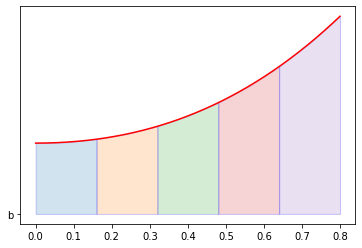

In [10]:
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

X = np.linspace(a,b,n+1)
Y = f(X)

x = np.linspace(a,b,1000)
plt.plot(x,f(x),color = "red")

for i in range(n):
    xs = [X[i],((X[i]+X[i+1])/2),X[i+1]]
    ys = [f(X[i]),f((X[i]+X[i+1])/2),f(X[i+1])]
    p = lagrange(xs, ys)
    plt.fill_between(xs, np.polyval(p, xs),'b',edgecolor='b',alpha=0.2)
plt.show()


### Całkowanie metodą Monte Carlo <a class="anchor" id="monte_carlo"></a>
<div align="justify">
Metoda Monte Carlo jest popularną metodą symulacyjną stworzoną przez polsko-amerykańskiego matematyka - Stanisława Ulama. Jedną z najczęstszych aplikacji tej metody jest numeryczne całkowanie.
Jeśli chcemy policzyć całkę oznaczoną możemy posłużyć się następującą metodą. Losujemy w przedziale całkowania $n$ punktów z przedziału $[x_a,x_b]$, a następnie przybliżamy
</div>

\begin{equation}
\int_{x_a}^{x_b} f(x) \,dx \approx \frac{x_b - x_a}{n} \sum_{i=1}^{n} f(x_i) \,dx
\tag{16}
\end{equation}

Pseudo kod dla metody Crude Monte Carlo:
<div id = "Algorytm_4" style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;" > 
<b><h4>Algorytm 4</h4></b>   
<br>
&nbsp;<b>Wejście:</b>
<ul>
    <li> f - funkcja, dla której szukamy całki </li>
    <li> a, b - przedział całkowania </li>
    <li> n - ilość losowanych punktów $<a,b>$ </li>
</ul>  
    
&nbsp;<b>Wyjście:</b>
<ul>
    <li> I - przybliżenie całki </li>
</ul>
    
&nbsp;<b>Algorytm:</b>
<ul style="list-style-type: none;"> 
    <li><b>funkcja </b>f_crudeMonteC(f,a,b,n)</li>
    <li> h &larr; (b - a)/n </li>
    <li>wylosuj n dowolnych punktów X z $<a,b>$ </li>    
    <li> Y &larr; f(X) </li> 
    <li> I &larr; Y * h </li> 
</ul>
</div>

<br>    
    
<div align="justify">
Istnieje również algorytm Monte Carlo z zastosowaniem metody akceptacji i odrzuceń. Tutaj wartość całki obliczana jest jako ułamek pola powierzchni prostokąta o bokach $ max(f(x)) $ oraz $ x_b - x_a $. Ułamek ten jest jednocześnie prawdopodobieństwem, że losowany punkt na tym obszarze znajdzie się pod wykresem funkcji $ f(x) $:
</div>
    
Pseudo kod dla metody Crude Monte Carlo:
<div id = "Algorytm_5" style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;" > 
<b><h4>Algorytm 5</h4></b>   
<br>
&nbsp;<b>Wejście:</b>
<ul>
    <li> f - funkcja, dla której szukamy miejsca zerowego </li>
    <li> a, b - granice przedziału w którym znajduje się pierwiastek </li>
    <li> n - żądana dokładność </li>
</ul>  
    
&nbsp;<b>Wyjście:</b>
<ul>
    <li> I - przybliżenie całki </li>
</ul>
    
&nbsp;<b>Algorytm:</b>
<ul style="list-style-type: none;"> 
    <li><b>funkcja</b> f_MonteC(f,a,b,n,*args) </li>
    <li>X &larr; wylosuj n dowolnych punktów x z <a,b> </li>
    <li> Y &larr; f(X) </li>
    <li> <b> if </b> <i> length of args == 0 </i> <b> then </b> </li>
        <li>  &nbsp;minY &larr; min(y) </li>
        <li>  &nbsp;maxY &larr; max(y) </li>
        <li> <b>else </b> </li>
        <li>  &nbsp;minY &larr; args[0] </li>
        <li>  &nbsp;maxY &larr; args[1] </li>
    <li> Yi &larr; wylosuj n punktów z przedziału <minY,maxY> </li>
    <li> k &larr; sum((Yi > 0 and Yi <= Y)  AND (Yi < 0, Yi >= Y) </li> 
    <li> I &larr; k/n*|(b-a)|*|maxY - minY |</li> 
</ul>

## Ćwiczenie 5<a class="anchor" id="cw5"></a>

   Dokonaj implementacji prostej metody Crude Monte Carlo opisanej w [algorytmie 4](#Algorytm_4). Wykonaj metodę kilkukrotnie dla różnych n (np. 10, 100, 1000)
    
Wywołanie metody Crude Monte Carlo  wygląda następująco:
```python
I = f_crudeMonteC(f,a,b,n)
```

gdzie jej parametry to:
* &ensp;fun - funkcja, dla której szukamy całki
* &ensp;a, b - przedział całkowania
* &ensp;n - żądana dokładność

a zwracane wartości to:

* &ensp;I - przybliżenie całki    

In [11]:
import numpy as np
def f_crudeMonteC(f,a,b,n):
    """
          :param fun: funkcja
          :param a: dolny przedział całkowania
          :param b: górny przedział całkowania
          :param n: ilość losowych punktow
          :return: przybliżona wartość całki
          """
    # szerokość pojedynczego przedziału
    h = (b - a) / n

    # losowanie n dowolnych punktów z przedziału <a,b>
    X = (b-a)*np.random.random_sample(n)+a
    Y = []

    # wartości funkcji w węzłach kwadratury
    for i in range(0, n):
        Y.append(f(X[i]))

    # konwertowanie tablicy Y na tablicę NumPy, którą da się przemnożyć przez liczbę
    Y = np.array(Y)

    # wartość przybliżona całki
    I = h*Y
    I = np.sum(I)
    return I

I = f_crudeMonteC(f,a,b,n)

print("Przybliżenie całki metodą Crude Monte Carlo wynosi = %f" % I)
print("Dokładna wartość całki to = %f" % s.evalf())
print("Błąd oszacowania to = ", s.evalf() - I)

Przybliżenie całki metodą Crude Monte Carlo wynosi = 1.351609
Dokładna wartość całki to = 1.243733
Błąd oszacowania to =  -0.107875776793722


<div align="justify">
    <b><h3>Wizualizacja metody Crude Monte Carlo</h3></b>
</div>

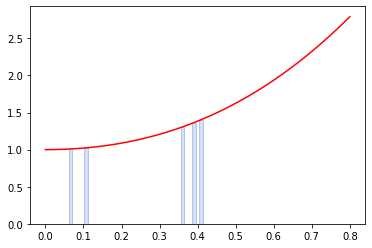

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f_crudeMonteC(f,a,b,n):
    X = (b-a)*np.random.random_sample(n)+a
    Y = []
    for i in range(0, n):
        Y.append(f(X[i]))
    return X,Y

x = np.linspace(a,b)

fig, ax = plt.subplots()
ax.plot(x, f(x), 'r')

X = (b-a)*np.random.random_sample(n)+a
Y = []
for i in range(0, n):
    Y.append(f(X[i]))

X,Y = f_crudeMonteC(f,a,b,n)
plt.bar(X,Y,width=0.01,alpha=0.2,edgecolor='b')
plt.show()


## Ćwiczenie 6<a class="anchor" id="cw6"></a>

   Dokonaj implementacji metody Monte Carlo opisanej w [algorytmie 5](#Algorytm_5).

<div align="justify">
    <ul>
        <li>
            zdefiniuj funkcję, która na przedziale $<a,b>$ jest nie jemna, np. $y = x^2 + 2x + 1 $
        </li>
        <li>
            wykonaj metodę kulkukrotnie dla różnych n (np. 10, 100, 1000)
        </li>
        <li>
            porównaj wyniki z metodą z ćwiczenia 5
        </li>
    </ul>
</div>    
    
Wywołanie metodu Monte Carlo  wygląda następująco:
```python
I = f_crudeMonteC(f,a,b,n)
```

gdzie jej parametry to:
* &ensp;fun - funkcja, dla której szukamy całki
* &ensp;a, b - przedział całkowania
* &ensp;n - ilość losowanych punktów

a zwracana wartości to:

* &ensp;I - przybliżenie całki    
</div>

In [13]:
import numpy as np
def f_MonteC(f, a, b, n,*args):
    """
           :param f: funkcja
           :param a: dolny przedział całkowania
           :param b: górny przedział całkowania
           :param n: ilość losowych punktow
           :param min: minimalna wartość funkcji
           :param max: maksymalna wartość funkcji
           :return: przybliżona wartość całki
           """
    # losowanie n dowolnych punktów z przedziału <a,b>
    X = np.random.uniform(a, b, n)

    Y = []
    # wartości funkcji w węzłach kwadratury
    for i in range(0, n):
        Y.append(f(X[i]))

    if len(args) == 0:
        minY = np.min(Y)
        maxY = np.max(Y)
    else:
        minY = args[0]
        maxY = args[1]

    # n losowych wartości z przedziału <0, maxY>
    Yi = np.random.uniform(minY, maxY, n)  ##To są losowe Y dla losowych X
    
    # obliczenie ułamka prawdopodobieństwa, że losowan punkt znajduje się pod wykresem funkcji f(x)
    
    #obliczanie punktów leżących nad osią OX i lęzących pod wykresem funkcji oraz obliczanie punktów znajdujących
    
    #się poniżej osi OX i lezących nad krzywą
    pos = np.where(np.logical_and(Yi > 0, Yi <= Y))
    neg = np.where(np.logical_and(Yi < 0, Yi >= Y))
    
    k = 0
    # zliczanie dodatnich punktów leżących pod krzywą
    k += np.count_nonzero(pos)
    k += np.count_nonzero(pos == 0)
    # zliczanie ujemnych punktów leżących nad krzywą
    k -= np.count_nonzero(neg)
    k +=  np.count_nonzero(neg == 0)
    
    # wartość przybliżona całki. k/n procent punktów znajdujących się w kwadracie (b-a)*maxY
    P = np.abs(b - a) * np.abs(maxY - minY)
    I = k / n * P
    return I

I =  f_MonteC(f,a,b,n)

print("Przybliżenie całki metodą Monte Carlo = %f" % I)
print("Dokładna wartość całki to = %f" % s.evalf())
print("Błąd oszacowania to = ", s.evalf() - I)

Przybliżenie całki metodą Monte Carlo = 0.350451
Dokładna wartość całki to = 1.243733
Błąd oszacowania to =  0.893282373187288


<div align="justify">
    <b><h3>Wizualizacja metody Crude Monte Carlo</h3></b>
</div>

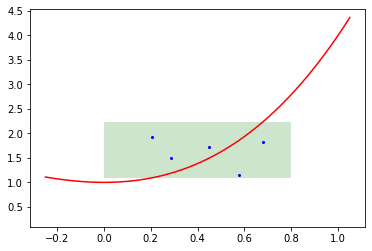

In [14]:
import numpy as np
def f_MonteC(f, a, b, n,*args):
    X = np.random.uniform(a, b, n)

    Y = []
    for i in range(0, n):
        Y.append(f(X[i]))

    if len(args) == 0:
        minY = np.min(Y)
        maxY = np.max(Y)
    else:
        minY = args[0]
        maxY = args[1]
    Yi = np.random.uniform(minY, maxY, n)
    return X, Yi, minY, maxY


import matplotlib.pyplot as plt

x = np.linspace(a-0.25,b+0.25)

fig, ax = plt.subplots()
ax.plot(x, f(x), 'r')
ax.set_ylim(bottom=0)

X,Y,min,max = f_MonteC(f,a,b,n)
plt.plot(X,Y,'bo', markersize=2)

rectangle = plt.Rectangle((a,min),b-a,np.abs(max-min),alpha=0.2,fc = 'green')

plt.gca().add_patch(rectangle)

plt.ylim(min-1)
plt.show()


### Kwadratury Gaussa <a class="anchor" id="gauss"></a>

<div align="justify">
Kwadratura Gaussa została stworzona w celu uzyskania dokładnego wyniku dla wielomianów stopnia $ 2n - 1 $. Polega na odpowiednim doborze wag $ w_1,w_2,...w_n $ i punktów $ x_i $.
Jeśli za dziedzinę przyjmniemy zakres $ <-1: 1> $ to będziemy mogli zapisać ją jako:
</div>

\begin{equation}
\int_{-1}^{1} f(x) \,dx = \sum_{i=1}^{n} w_if(x_i)
\tag{17}
\end{equation},

<div align="justify">
    Stosując podstawienie, wzór (17) można przekształcić do postaci:
</div>

\begin{equation}
\int_{-1}^{1} f(x) \,dx \approx \frac{b-a}{2} \sum_{i=1}^{n} w_if(\frac{b+a}{2} + \frac{b-a}{2}t_i)
\tag{18}
\end{equation},

<div align="justify">
gdzie $ t_i $ są pierwiastkami wielomianu Legendre'a, a $ w_i $ są wagami danych pierwiastków i wymagają do obliczenia m.in. znajomości pochodnej wielomianu Legendre'a danego stopnia. Powyższa metoda nosi nazwę Kwadratury Gaussa-Legendre'a.
</div>

Pseudo kod dla kwadratury Gaussa Legendre'a:
<div id = "Algorytm_6" style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;" > 
<b><h4>Algorytm 6</h4></b>   
<br>
&nbsp;<b>Wejście:</b>
<ul>
    <li> f - funkcja, dla której szukamy całki </li>
    <li> a, b - przedział całkowania </li>
    <li> n - ilość podprzedziałów, na które dzielimy odcinek $<a,b>$ </li>
</ul>  
    
&nbsp;<b>Wyjście:</b>
<ul>
    <li> I - przybliżenie całki </li>
</ul>
    
&nbsp;<b>Algorytm:</b>
<ul style="list-style-type: none;"> 
    <li><b>f_gauss_legrande(f,a,b,n)</b></li>
    <li> half &larr; (b-a)/2 </li>  
    <li> mid &larr; (a+b)/2 </li> 
    <li> [t,w] &larr; np.polynomial.legendre.leggauss </li> 
    <li> <b> for </b> i &larr; 0 <b> to </b> n <b> do </b> <br>    
        <ul style="list-style-type: none;">
            <li> I += wi * f(mid+half*ti) </li> 
         </ul> 
    <li> <b> end for </b> </li> 
    <li> I &larr; I*half </li> 
</ul>
</div>


## Ćwiczenie 7<a class="anchor" id="cw7"></a>

   Korzystając z [Algrytmu 6](#Algorytm_6) dokonaj implementacji metody Gaussa_Legendre'a. Dołączona funkcja [t,w] = np.polynomial.legendre.leggauss(n) zwraca wartości węzłów $t_i$ oraz wag $w_i$ dla podanego stopnia wielomianu n.
  
    
Wywołanie metody Gaussa_Legendre'a wygląda następująco:
```python
I = f_gauss_legrande(f,a,b,n)
```

gdzie jej parametry to:
* &ensp;fun - funkcja, dla której szukamy całki
* &ensp;a, b -przedział całkowania
* &ensp;n - ilość podprzedziałów, na które dzielimy odcinek <a,b>

a zwracana wartości to:

* &ensp;I - przybliżenie całki    
</div>

In [15]:
import numpy as np

def f_gauss_legrande(f,a,b,n):
    """
          :param fun: funkcja
          :param a: dolny przedział całkowania
          :param b: górny przedział całkowania
          :param n: ilość podprzedziałów, na które dzielimy odcinek <a,b>
          :return: przybliżona wartość całki
          """

    half = float(b-a)/2
    mid = (a+b)/2
    [t,w] = np.polynomial.legendre.leggauss(n)

    I = 0
    for i in range(n):
        I += w[i] * f(mid+half*t[i])

    I *= half

    return I
I = f_gauss_legrande(f,a,b,n)

print("Przybliżenie całki przy użyciu metody Gaussa_Legendre'a wynosi = %f" % I)
print("Dokładna wartość całki to = %f" % s.evalf())
print("Błąd oszacowania to = ", s.evalf() - I)

Przybliżenie całki przy użyciu metody Gaussa_Legendre'a wynosi = 1.243733
Dokładna wartość całki to = 1.243733
Błąd oszacowania to =  -2.22044604925031e-16


### Całkowanie w pythonie <a class="anchor" id="python"></a>
<br>
<div align="justify">
Jako, że standardowa biblioteka python nie zawieraja metod do całkowania numerycznego, z pomocą przychodzi biblioteka scipy.
Oferuje ona kilka rożnych metod numerycznego obliczania całek. Najczęściej używane to: quad(wykorzystuje metodę Clenshaw-Curtis'a ), fixed_quad (wykorzystuje metodą Gaussa) oraz quadrature( wykorzystuję kwadratury Gaussa z parametrem tolerancji).
<br>    
Ich wywołanie wygląda następująco:
    
I = quad(func, a,b) <br>
I = fixed_quad(func,a,b) <br>
I = quadrature(func,a,b, tol) <br>

gdzie:
* &ensp;fun - funkcja, dla której szukamy całki
* &ensp;a, b - przedział całkowania
* &ensp;n - ilość podprzedziałów, na które dzielimy odcinek <a,b>
* &ensp;tol - wymagana dokładność oszacowania
    
a zwracana wartości to:

* &ensp;I - przybliżenie całki    
</div>

## Ćwiczenie 8<a class="anchor" id="cw8"></a>

<div align="justify">
    Porównaj zaimplementowaną powyżej metodę Gaussa-Legrende'a z funkcji fixed_quad z biblioteki scip, dla różnych wartości n.
</div>  

Wywołanie metody fixed_quad wygląda następująco:
```python
    I = scipy.integrate.fixed_quad(func, a, b, n)
```

gdzie jej parametry to:
* &ensp;func - funkcja, dla której szukamy całki
* &ensp;a, b - przedział całkowania
* &ensp;n - ilość podprzedziałów, na które dzielimy odcinek <a,b>

a zwracane wartości to:

* &ensp;I &rarr; przybliżenie całki

In [16]:
from scipy import integrate
I = integrate.fixed_quad(f,a,b,n=10)

print("Przybliżenie całki przy pomocy funkcji fixed_quad() wynosi = ",I[0])
print("Dokładna wartość całki to = %f" % s.evalf())
print("Błąd oszacowania to = ", s.evalf() - I[0])

Przybliżenie całki przy pomocy funkcji fixed_quad() wynosi =  1.2437333333333331
Dokładna wartość całki to = 1.243733
Błąd oszacowania to =  4.44089209850063e-16


### Metody Adaptacyjne<a class="anchor" id="adaptive"></a>

<div align="justify">
Złożone algorytmy prostokątów, trapezów i parabol nie są optymalnymi algorytmami. Głównie ma to przyczynę w tym, że przedział całkowania dzielimy na równe części, nie niwelując przy tym błędów powstających w konkretnych przedziałach. Jak wiemy, błąd metody trapezów wyraża się wzorem:
</div>


\begin{equation}
I(f) - P_n(f) = -\frac{(b-a)^3}{12n^2}f^{(4)}(\xi_n)
\tag{19}
\end{equation},

<div align="justify">
W związku z tym prawdziwe jest, że:
</div>
    
\begin{equation}
I(f) - P_2(f) = -\frac{(b-a)^3}{12} \frac{1}{4}(\xi_2)
\tag{20}
\end{equation},

oraz

\begin{equation}
P_1(f) - P_2(f) = -\frac{(b-a)^3}{12}(f^{(4)}(\xi_1) - \frac{1}{4}f^{(4)}(\xi_2))
\tag{21}
\end{equation},

<div align="justify">
Zakładając, że dla odpowiednio małych zakresów $ F^{(4)}\xi_1 \approx f^{(4)}(\xi_2)$, można zapisać:
</div>

\begin{equation}
f^{(4)}(\xi_1) - \frac{1}{4}f^{(4)}(\xi_2) \approx \frac{3}{4}f^{(4)}(\xi_1)
\tag{22}
\end{equation},

zatem

\begin{equation}
I(f) - P_2(f) \approx \frac{1}{3}(P_1(f) - P_2(f))
\tag{23}
\end{equation},

<div align="justify">
Oznacza to, że na danym przedziale można założyć, że różnica pomiędzy przybliżeniem na jednym oraz na dwóch przedziałach jest równa trzykrotności błędu na dwóch przedziałach. Jeśli ten błąd jest większy niż zakładana dokładność, przedział należy podzielić i ponownie obliczyć przybliżenie na nowo powstałych przedziałach, aż do uzyskania zakładanej dokładności.
</div>


Pseudo kod dla metody Adaptacyjnej:
<div id = "Algorytm_7" style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;" > 
<b><h4>Algorytm 7</h4></b>   
<br>
&nbsp;<b>Wejście:</b>
<ul>
    <li> f - całkowana funkcja </li>
    <li> a, b - granice całkwania </li>
    <li> tol - żądana dokładność </li>
</ul>  
    
&nbsp;<b>Wyjście:</b>
<ul>
    <li> I &rarr; przybliżona wartość całki </li>
</ul>
    
&nbsp;<b>Algorytm:</b>
<ul style="list-style-type: none;"> 
    <li><b>funkcja </b>f_adapt(f,a,b,tol)</li>
    <li> m &larr; (a+b)/2 </li>
    <li> P1 &larr; f_trapI(f,a,b) </li>
    <li> P2 &larr; f_trapI(f,a,m) + f_trapI(f,b,b) </li>
        <li> <b> if </b> <i>  $|P1 - P2| < 3*tol$ </i> <b> then </b> <br>
            &nbsp;return  P2  <br>   
    <li> <b>else</b></li>    
        &nbsp;return f_adapt(f, a, (a+b)/2, tol) + f_adapt(f, (a+b)/2, tol)  <br> 
</ul>
</div>

## Ćwiczenie 9<a class="anchor" id="cw9"></a>

   Korzystając z [algorytmu 7](#Algorytm_7) dokonaj implementacji metody adaptacyjnej przy użyciu wzoru trapezów.  


In [17]:
tol = 10 # zakładana dokładność

def f_trapI(f,a,b):
    #szerokość pojedynczego przedziału
    h = b-a
    I = h*(f(a) + f(b))/2
    return I


def f_adapt(f, a, b, tol):
    m = (a + b) / 2.0
    P1 = f_trapI(f, a, b)
    P2 = f_trapI(f, a, m) + f_trapI(f, m, b)
    if abs(P1 - P2) < 3 * tol:
        return P2
    else:
        return f_adapt(f, a, m, tol) + f_adapt(f, m, b, tol)

I = f_adapt(f,a,b,tol)

print("Przybliżenie całki metodą adaptacyjną trepezów wynosi =",I)
print("Dokładna wartość całki to = %f" % s.evalf())
print("Błąd oszacowania to =", s.evalf() - I)

Przybliżenie całki metodą adaptacyjną trepezów wynosi = 1.3120000000000003
Dokładna wartość całki to = 1.243733
Błąd oszacowania to = -0.0682666666666667


<div align="justify">
    <b><h3>Wizualizacja adaptacyjnej metody trapezów</h3></b>
</div>

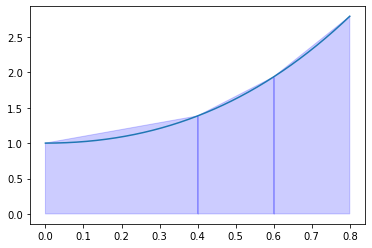

In [18]:
import numpy as np
from matplotlib import pyplot as plt

def f_trapI(f,a,b):
    h = b-a
    I = h*(f(a) + f(b))/2
    return I

Tab = []
def f_adapt(f, a, b, tol):
    m = (a + b) / 2.0
    P1 = f_trapI(f, a, b)
    P2 = f_trapI(f, a, m) + f_trapI(f, m, b)
    if abs(P1 - P2) < 3 * tol:
        Tab.append(a)
        Tab.append(b)
        return P2, Tab
    else:
        return f_adapt(f, a, m, tol) + f_adapt(f, m, b, tol), Tab


tol = 0.01

x = np.linspace(a, b, 1000)
fig, ax = plt.subplots()
ax.plot(x, f(x), label="x^2")
I,X = f_adapt(f, a, b, tol)

for i in range(len(X)-1):
    xs = [X[i],X[i],X[i+1],X[i+1]]
    ys = [0,f(X[i]),f(X[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

plt.show()
